In [37]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [38]:
df = pd.read_csv("Professions.csv", header = None)
df.columns = ['Name', "Census"]
df.Census = df.Census/100

In [39]:
def getGoogle(searchterm):
    csv_loc = os.path.join(os.getcwd(),"Datasets",searchterm + ".csv")
    df = pd.read_csv(csv_loc)
    
    df['size'] = df.height*df.width
        
    df['number'] = 0
    for i, row in df.iterrows():
        df.loc[i, 'number'] = re.search(r'\d+', row['file']).group()
        
    condition = df.sort_values(["size"]).duplicated("number", keep="first").values
    res = df[~condition]
    return sum(res.PFemale>0.5)/res.shape[0]

In [40]:
df['Google'] = 0
for i, row in df.iterrows():
    df.loc[i, 'Google'] = getGoogle(row['Name'])

In [44]:
from scipy.stats import pearsonr
pearsonr(df['Census'].values, df['Google'].values)

(0.8693220938115741, 1.2266873496389822e-05)

C:\Users\Juanl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 1), (0, 1)]

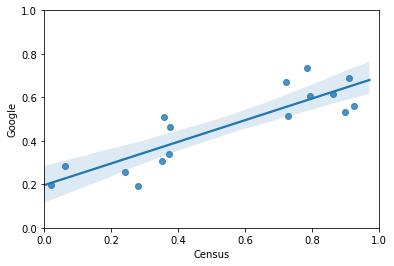

In [43]:
lm = sns.regplot(x=df.Census, y=df.Google)
lm.set(ylim=(0, 1), xlim = (0,1))